In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.image as mpimg

In [2]:
# defining global variable path
image_path = "dermnet1/train"

'''function to load folder into arrays and 
then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'high', file)
         for file in os.listdir(path + "/high") if      file.endswith('.jpg')])
 
    return image_files

In [3]:
# Preprocessing
def processing(data):
    
    # Reading 15 images to work
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:15]]
    try:
        print('Sample',img[2].shape)
    except AttributeError:
        print("shape not found")
   
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[i].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[i]
    #display_one(original)
    # ----------------------------------
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[2]
    #display(original, image, 'Sample', 'Blured')
    #---------------------------------
    # Segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Displaying segmented images
    #display(original, thresh, 'Sample', 'Segmented')
    # Further noise removal (Morphology)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [4]:
def main():
    # calling global variable
    global image_path
    '''The var Dataset is a list with all images in the folder '''
    dataset = loadImages(image_path)
    print('number of FILES in dir', len(dataset))
    print("--------------------------------")
    #print(cv2.imread(dataset[0]).shape)
    print("List of files the first 15 in the folder:\n",dataset[:15])
    print("--------------------------------")
    
    # sending all the images to pre-processing
    processing(dataset)
   
    #list files in directory
    #a = tf.gfile.ListDirectory('drive/My Drive/BiSeNet/dataset/train')
    #print(a)
  
main()

number of FILES in dir 72
--------------------------------
List of files the first 15 in the folder:
 ['dermnet1/train\\high\\07Acne081101.jpg', 'dermnet1/train\\high\\07AcnePittedScars.jpg', 'dermnet1/train\\high\\07AcnePittedScars1.jpg', 'dermnet1/train\\high\\07PerioralDermEye.jpg', 'dermnet1/train\\high\\07PerioralDermNose.jpg', 'dermnet1/train\\high\\07PerioralDermq.jpg', 'dermnet1/train\\high\\07PerioralSteroid1.jpg', 'dermnet1/train\\high\\07PerlecheAccutane.jpg', 'dermnet1/train\\high\\07Rhinophyma1.jpg', 'dermnet1/train\\high\\07Rhinophyma1a.jpg', 'dermnet1/train\\high\\07Rhinophymaq.jpg', 'dermnet1/train\\high\\07RosaceaForehead.jpg', 'dermnet1/train\\high\\07RosaceaFulFAce.jpg', 'dermnet1/train\\high\\07RosaceaK0216.jpg', 'dermnet1/train\\high\\07RosaceaK02161.jpg']
--------------------------------
Sample (472, 720, 3)
RESIZED (220, 220, 3)


In [5]:
#Loading training dataset for high
folder_high_train = 'dermnet1/train/high'
#Loading training dataset for low
folder_low_train = 'dermnet1/train/low'
#Loading training dataset for medium
folder_medium_train = 'dermnet1/train/medium'

#Converting images to RGB
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [6]:
# Load in training images

#importing images of training dataset-high to variable ims-high 
ims_high = [read(os.path.join(folder_high_train, filename)) for filename in os.listdir(folder_high_train)]
#converting them into array, type-object
X_high = np.array(ims_high, dtype=object)
#importing images of training dataset-low to variable ims-low
ims_low = [read(os.path.join(folder_low_train, filename)) for filename in os.listdir(folder_low_train)]
#converting them into array, type-object
X_low = np.array(ims_low, dtype=object)
#importing images of training dataset-medium to variable ims-medium
ims_medium = [read(os.path.join(folder_medium_train, filename)) for filename in os.listdir(folder_medium_train)]
#converting them into array, type-object
X_medium = np.array(ims_medium, dtype=object)

In [7]:
#Loading testing dataset for high
folder_high_test = 'dermnet1/test/high'
#Loading testing dataset for low
folder_low_test = 'dermnet1/test/low'
#Loading testing dataset for medium
folder_medium_test = 'dermnet1/test/medium'

#Converting images to RGB
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [8]:
# Load in testing pictures

#importing images of testing dataset-high to variable ims-high
ims_high = [read(os.path.join(folder_high_test, filename)) for filename in os.listdir(folder_high_test)]
X_high_test = np.array(ims_high, dtype=object)
#importing images of testing dataset-low to variable ims-low
ims_low = [read(os.path.join(folder_low_test, filename)) for filename in os.listdir(folder_low_test)]
X_low_test = np.array(ims_low, dtype=object)
#importing images of testing dataset-medium to variable ims-medium
ims_medium = [read(os.path.join(folder_medium_test, filename)) for filename in os.listdir(folder_medium_test)]
X_medium_test = np.array(ims_medium, dtype=object)

In [9]:
# Create labels

#Return a new array of given shape and type, filled with zeros.
y_high = np.zeros(X_high.shape[0])
#Returns a new array of given shape and data type, where the element's value is set to 1. 
y_low = np.ones(X_low.shape[0])

y_medium = np.zeros(X_medium.shape[0])


y_high_test = np.zeros(X_high_test.shape[0])
y_low_test = np.ones(X_low_test.shape[0])

y_medium_test = np.zeros(X_medium_test.shape[0])


In [10]:
# Merge data 
#This function is used to join two or more arrays of the same shape along a specified axis. 
X_train = np.concatenate((X_high, X_low, X_medium), axis = 0)
y_train = np.concatenate((y_high, y_low, y_medium), axis = 0)


X_test = np.concatenate((X_high_test, X_low_test, X_medium_test), axis = 0)
y_test = np.concatenate((y_high_test, y_low_test, y_medium_test), axis = 0)

In [11]:
# Shuffle data
# It creates an instance of ndarray with evenly spaced values and returns the reference to it. 
s = np.arange(X_train.shape[0])
#creates an array of specified shape and fills it with random values as per standard normal distribution.
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

C:\Users\Aditi Bane\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


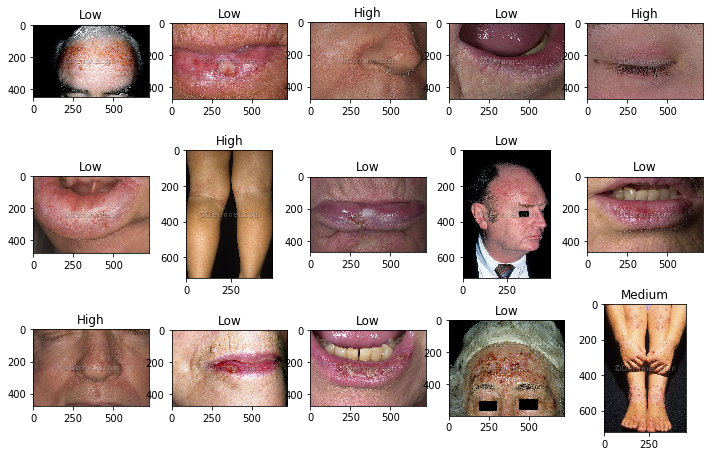

In [12]:
# Display first 15 images, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('High')
    else:
        ax.title.set_text('Low')
    plt.imshow(X_train[i], interpolation='nearest')
for j in range(2, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[j] == 0:
        ax.title.set_text('Medium')
    plt.imshow(X_train[j], interpolation='nearest')
plt.show()